# Main Imports

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

In [44]:
base_path = os.path.join("..", "clean-files", "UL", "throughput", "4th-attempt")
cenarios = ["cell-based", "cell-free"]
num_ues = 10

In [45]:
df_total = pd.DataFrame()

# Loop over scenarios and UEs
for scenario in cenarios:
    folder_path = os.path.join(base_path, scenario, str(num_ues))

    for filename in sorted(os.listdir(folder_path)):
        if not filename.endswith(".txt"):
            continue

        filepath = os.path.join(folder_path, filename)
        rep = filename.replace(".txt", "")

        with open(filepath, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]

        dados_ues = defaultdict(list)
        for line in lines:
            match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", line)
            if match:
                ue = int(match.group(1))
                throughput = float(match.group(2))
                dados_ues[ue].append(throughput)

        for ue, values in dados_ues.items():
            time = [i * 10 for i in range(len(values))]
            df = pd.DataFrame({
                "Time (ms)": time,
                "Throughput (Mbps)": values,
                "UE": ue,
                "Scenario": "Cell-Based" if scenario == "cell-based" else "Cell-Free",
                "Num_UEs": num_ues,
                "Repetition": rep
            })
            df_total = pd.concat([df_total, df], ignore_index=True)

# Check
print(df_total.head())
print(df_total["Scenario"].value_counts())


   Time (ms)  Throughput (Mbps)  UE    Scenario  Num_UEs Repetition
0          0            0.17128   1  Cell-Based       10          1
1         10            0.17095   1  Cell-Based       10          1
2         20            0.11395   1  Cell-Based       10          1
3         30            0.22880   1  Cell-Based       10          1
4         40            0.11962   1  Cell-Based       10          1
Scenario
Cell-Based    3875
Cell-Free     3875
Name: count, dtype: int64


C:\Users\Ana Gouveia\AppData\Local\Temp\ipykernel_15636\1689153432.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


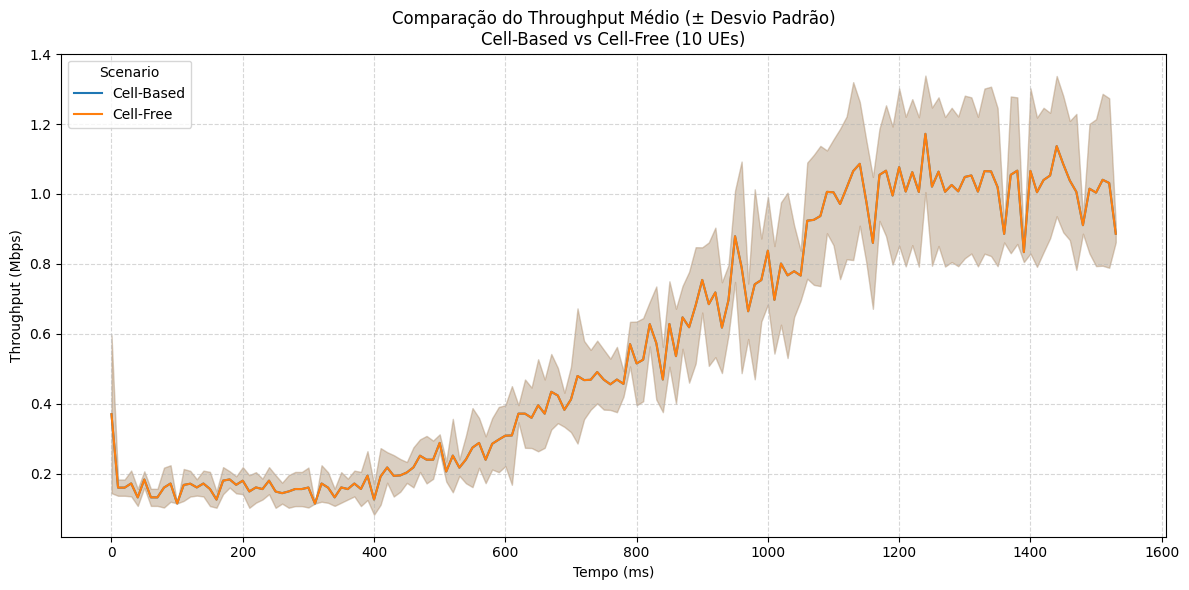

In [48]:

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_total,
    x="Time (ms)",
    y="Throughput (Mbps)",
    hue="Scenario",
    estimator="mean",
    ci="sd"  # sombra com desvio padrão
)
plt.title("Comparação do Throughput Médio (± Desvio Padrão)\nCell-Based vs Cell-Free (10 UEs)")
plt.xlabel("Tempo (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()